<a href="https://colab.research.google.com/github/GabrielMartinello/BootCampAngular/blob/master/C%C3%B3pia_de_An%C3%A1lise_Mission_Space_Launches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import gdown
import pandas as pd
import folium
from geopy.geocoders import Photon
from geopy.geocoders import Nominatim
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Link: https://drive.google.com/file/d/1sLqLV_XyFbpbKwNSSSE-yIlNdMr2nP3R/view?usp=drive_link
!gdown 1sLqLV_XyFbpbKwNSSSE-yIlNdMr2nP3R

Downloading...
From: https://drive.google.com/uc?id=1sLqLV_XyFbpbKwNSSSE-yIlNdMr2nP3R
To: /content/mission_launches.csv
100% 632k/632k [00:00<00:00, 5.30MB/s]


In [ ]:
df = pd.read_csv('mission_launches.csv', encoding='latin1')

In [ ]:
df

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [ ]:
df['Location'].unique()

array(['LC-39A, Kennedy Space Center, Florida, USA',
       'Site 9401 (SLS-2), Jiuquan Satellite Launch Center, China',
       'Pad A, Boca Chica, Texas, USA',
       'Site 200/39, Baikonur Cosmodrome, Kazakhstan',
       'SLC-41, Cape Canaveral AFS, Florida, USA',
       'LC-9, Taiyuan Satellite Launch Center, China',
       'Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'LC-101, Wenchang Satellite Launch Center, China',
       'SLC-40, Cape Canaveral AFS, Florida, USA',
       'LA-Y1, Tanegashima Space Center, Japan',
       'LP-0B, Wallops Flight Facility, Virginia, USA',
       'Site 95, Jiuquan Satellite Launch Center, China',
       'LC-3, Xichang Satellite Launch Center, China',
       'Pad 1, Palmachim Airbase, Israel',
       'Rocket Lab LC-1A, M?Â\x81hia Peninsula, New Zealand',
       'LC-2, Xichang Satellite Launch Center, China',
       'Xichang Satellite Launch Center, China',
       'Cosmic Girl, Mojave Air and Space Port, California, USA',
       'Site 43/4, Ples

In [ ]:

dfLocations = df['Location'].unique()

locations = []

for location in dfLocations:
    # Substituindo o caractere problemático '?'
    location = location.replace('?', '')

    # Remove ou substitui caracteres problemáticos odeio /x81
    location = location.encode('ascii', errors='ignore').decode('ascii')

    if ',' in location:  # Verifica se há uma vírgula na string
        location = location.split(',', 1)[1].lstrip()  # Remove a primeira parte da string até a primeira vírgula
    locations.append(location)

In [ ]:
geolocator = Photon(user_agent="measurements")
locations_coor = []


for location in locations:
    loc = geolocator.geocode(location)
    if loc is not None:
        locations_coor.append((location, loc.latitude, loc.longitude))
    #time.sleep(1)

print(locations_coor)

[('Kennedy Space Center, Florida, USA', 28.519230999999998, -80.64317239050752), ('Jiuquan Satellite Launch Center, China', 40.964989, 100.2838214916303), ('Boca Chica, Texas, USA', 25.9922919, -97.1823793), ('Baikonur Cosmodrome, Kazakhstan', 45.917893199999995, 63.40837213703634), ('Taiyuan Satellite Launch Center, China', 28.24576155, 102.02793799844264), ('Baikonur Cosmodrome, Kazakhstan', 45.917893199999995, 63.40837213703634), ('Wenchang Satellite Launch Center, China', 28.24576155, 102.02793799844264), ('Tanegashima Space Center, Japan', 30.377712, 130.957706), ('Wallops Flight Facility, Virginia, USA', 37.93523815, -75.46969556654054), ('Jiuquan Satellite Launch Center, China', 40.964989, 100.2838214916303), ('Xichang Satellite Launch Center, China', 28.24576155, 102.02793799844264), ('Palmachim Airbase, Israel', 31.8990994, 34.691333996651494), ('Mhia Peninsula, New Zealand', -36.98115945, 175.67852372174352), ('Xichang Satellite Launch Center, China', 28.24576155, 102.0279379

In [ ]:
# Inicializa o mapa centrado na linha do equador, vamos ver se vai dar certo
m = folium.Map(location=[0, 0], zoom_start=2)

# Colocando a linha
folium.PolyLine([(0, -180), (0, 180)], color="red").add_to(m)

for point in locations_coor:
    folium.Marker([point[1], point[2]], popup=point[0]).add_to(m)

m

In [ ]:
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')
df.dtypes

#Limitei o agrupamento em 50, pois vem muitos registros e fica ruim de ver nos gráficos
Agrupamento = df.groupby('Location')['Price'].mean().reset_index(drop=False).head(50)
#Removo os valores que contém NaN
Agrupamento = Agrupamento.dropna()
Agrupamento = Agrupamento.round(3)


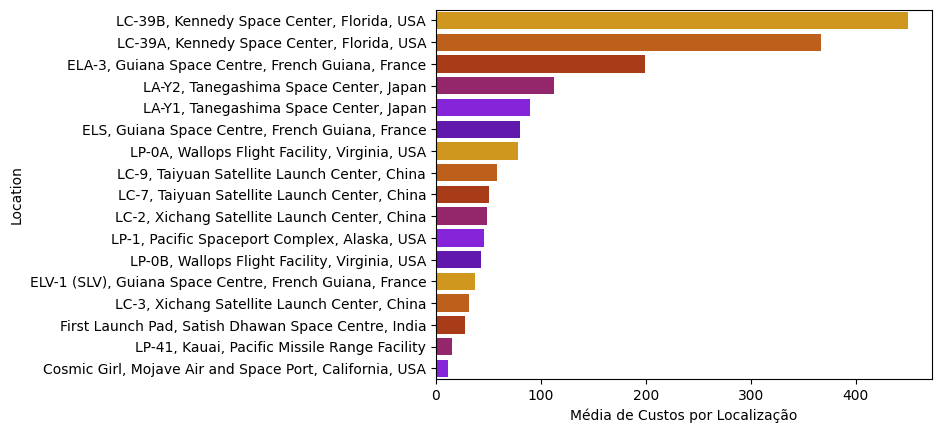

In [ ]:
Agrupamento = Agrupamento.sort_values(by = 'Price', ascending = False)

Figura = sns.color_palette('gnuplot') #Apenas selecionado as cores do gráfico
Figura.reverse() #Apenas invertendo a sequência de cores

ax = sns.barplot(y = 'Location', x = 'Price', data = Agrupamento, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10) #Aumentar o tamanho da Figura
ax.set_xlabel('Média de Custos por Localização')
plt.rcParams.update({"font.size": 18}) #Aumentar a letra
plt.savefig('Linha_x_custos.png', dpi=300)

Text(0, 0.5, 'Custo')

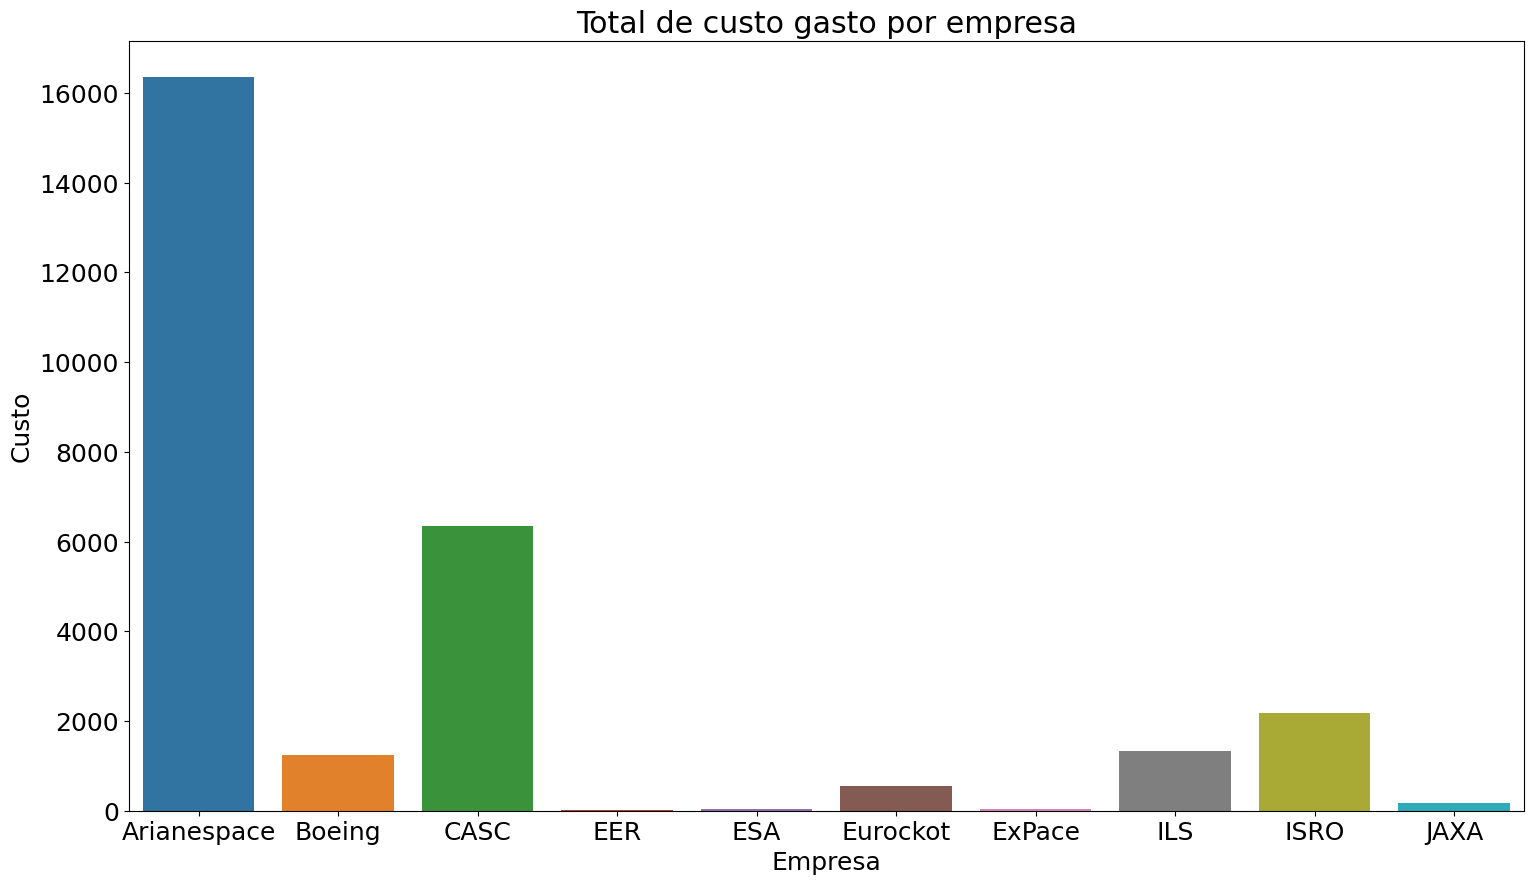

In [ ]:
#Agrupamento_Status = df.groupby('Location').Mission_Status.value_counts().unstack(fill_value=0)

money_spent = df[df["Price"].notna()]

#Somando o preço total por empresa e listando os 10 maiores
total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()

#Ordenando de forma decrescente
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent = total_money_spent.head(10)

sns.barplot(x='Organisation', y='Price', data=total_money_spent)
plt.title('Total de custo gasto por empresa')
plt.xlabel('Empresa')
plt.ylabel('Custo')

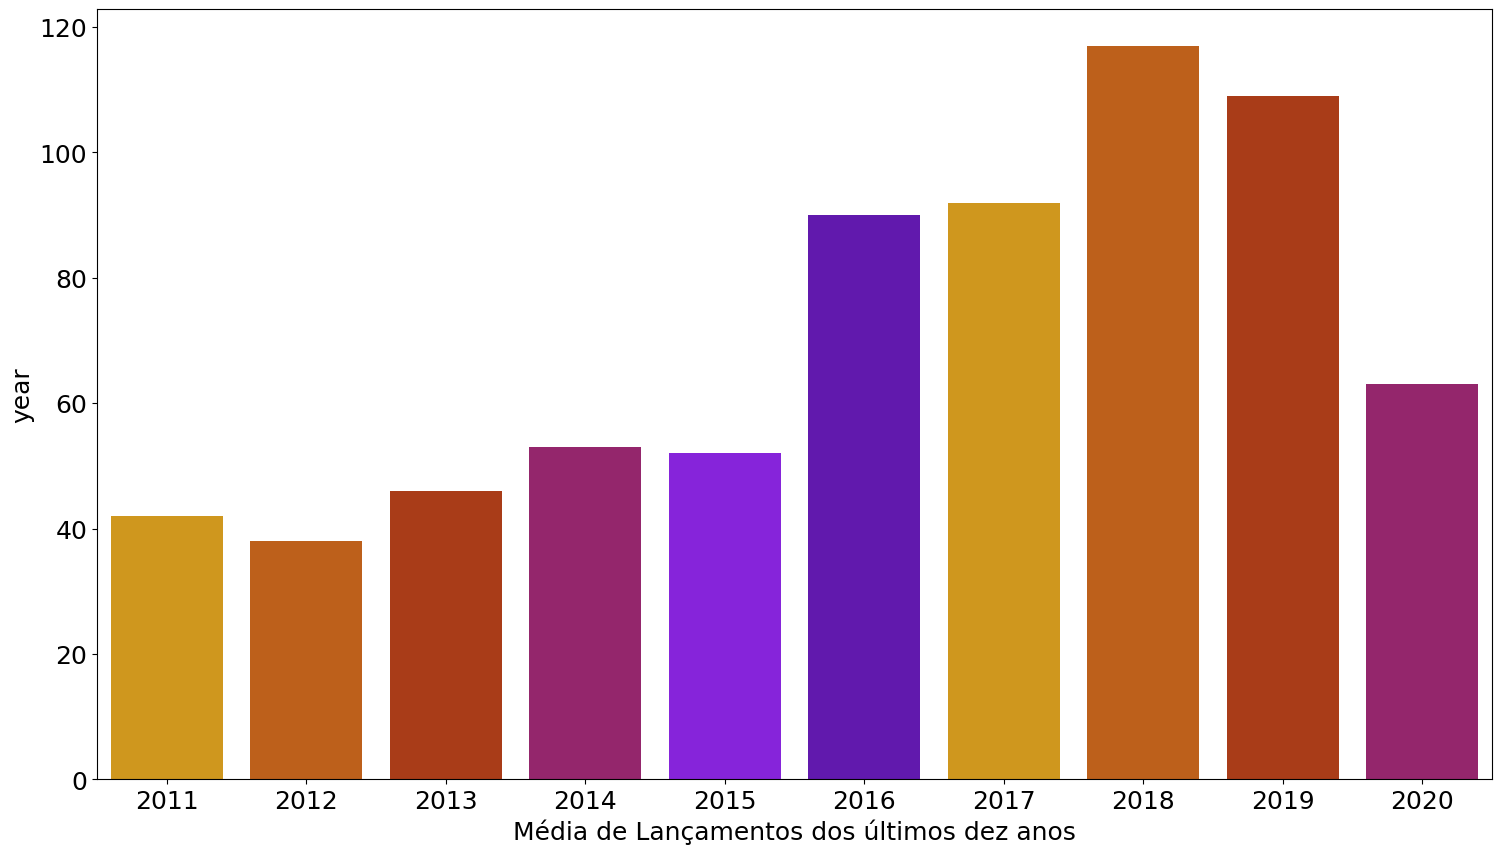

In [ ]:
#Convertendo data pro tipo date
df['date'] = pd.to_datetime(df['Date'])
df['year'] = df['date'].apply(lambda datetime: datetime.year)

# Conta os registros por data
ds = df['year'].value_counts().reset_index()

Figura = sns.color_palette('gnuplot')
Figura.reverse()

#Ordeno por ordem Decrescente
ds = ds.sort_values(by="index", ascending=False)
#Limito para os 10 últimos anos
ds = ds.head(10)

ax = sns.barplot(y = 'year', x = 'index', data = ds, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10)
ax.set_xlabel('Média de Lançamentos dos últimos dez anos')
plt.rcParams.update({"font.size": 18})
plt.savefig('mediaLancamentosPorAno.png', dpi=300)

In [ ]:
Agrupamento_Sucesso = pd.crosstab(df.Location, df.Mission_Status).sort_values(by = 'Success', ascending = False)

Agrupamento_Sucesso = Agrupamento_Sucesso.head(10)

Agrupamento_Sucesso

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Location,,,,
"Site 31/6, Baikonur Cosmodrome, Kazakhstan",8,6,1,220
"Site 132/1, Plesetsk Cosmodrome, Russia",8,5,0,203
"Site 43/4, Plesetsk Cosmodrome, Russia",6,6,0,190
"Site 41/1, Plesetsk Cosmodrome, Russia",6,6,0,186
"Site 132/2, Plesetsk Cosmodrome, Russia",8,2,0,164
"Site 1/5, Baikonur Cosmodrome, Kazakhstan",32,6,0,155
"Site 133/3, Plesetsk Cosmodrome, Russia",8,3,0,147
"Site 43/3, Plesetsk Cosmodrome, Russia",2,5,0,131
"LC-39A, Kennedy Space Center, Florida, USA",2,1,0,117


In [ ]:
Agrupamento_Sucesso.columns

Index(['Failure', 'Partial Failure', 'Prelaunch Failure', 'Success'], dtype='object', name='Mission_Status')

In [ ]:
Agrupamento_Sucesso.index

Index(['Site 31/6, Baikonur Cosmodrome, Kazakhstan',
       'Site 132/1, Plesetsk Cosmodrome, Russia',
       'Site 43/4, Plesetsk Cosmodrome, Russia',
       'Site 41/1, Plesetsk Cosmodrome, Russia',
       'Site 132/2, Plesetsk Cosmodrome, Russia',
       'Site 1/5, Baikonur Cosmodrome, Kazakhstan',
       'Site 133/3, Plesetsk Cosmodrome, Russia',
       'Site 43/3, Plesetsk Cosmodrome, Russia',
       'LC-39A, Kennedy Space Center, Florida, USA',
       'ELA-2, Guiana Space Centre, French Guiana, France'],
      dtype='object', name='Location')

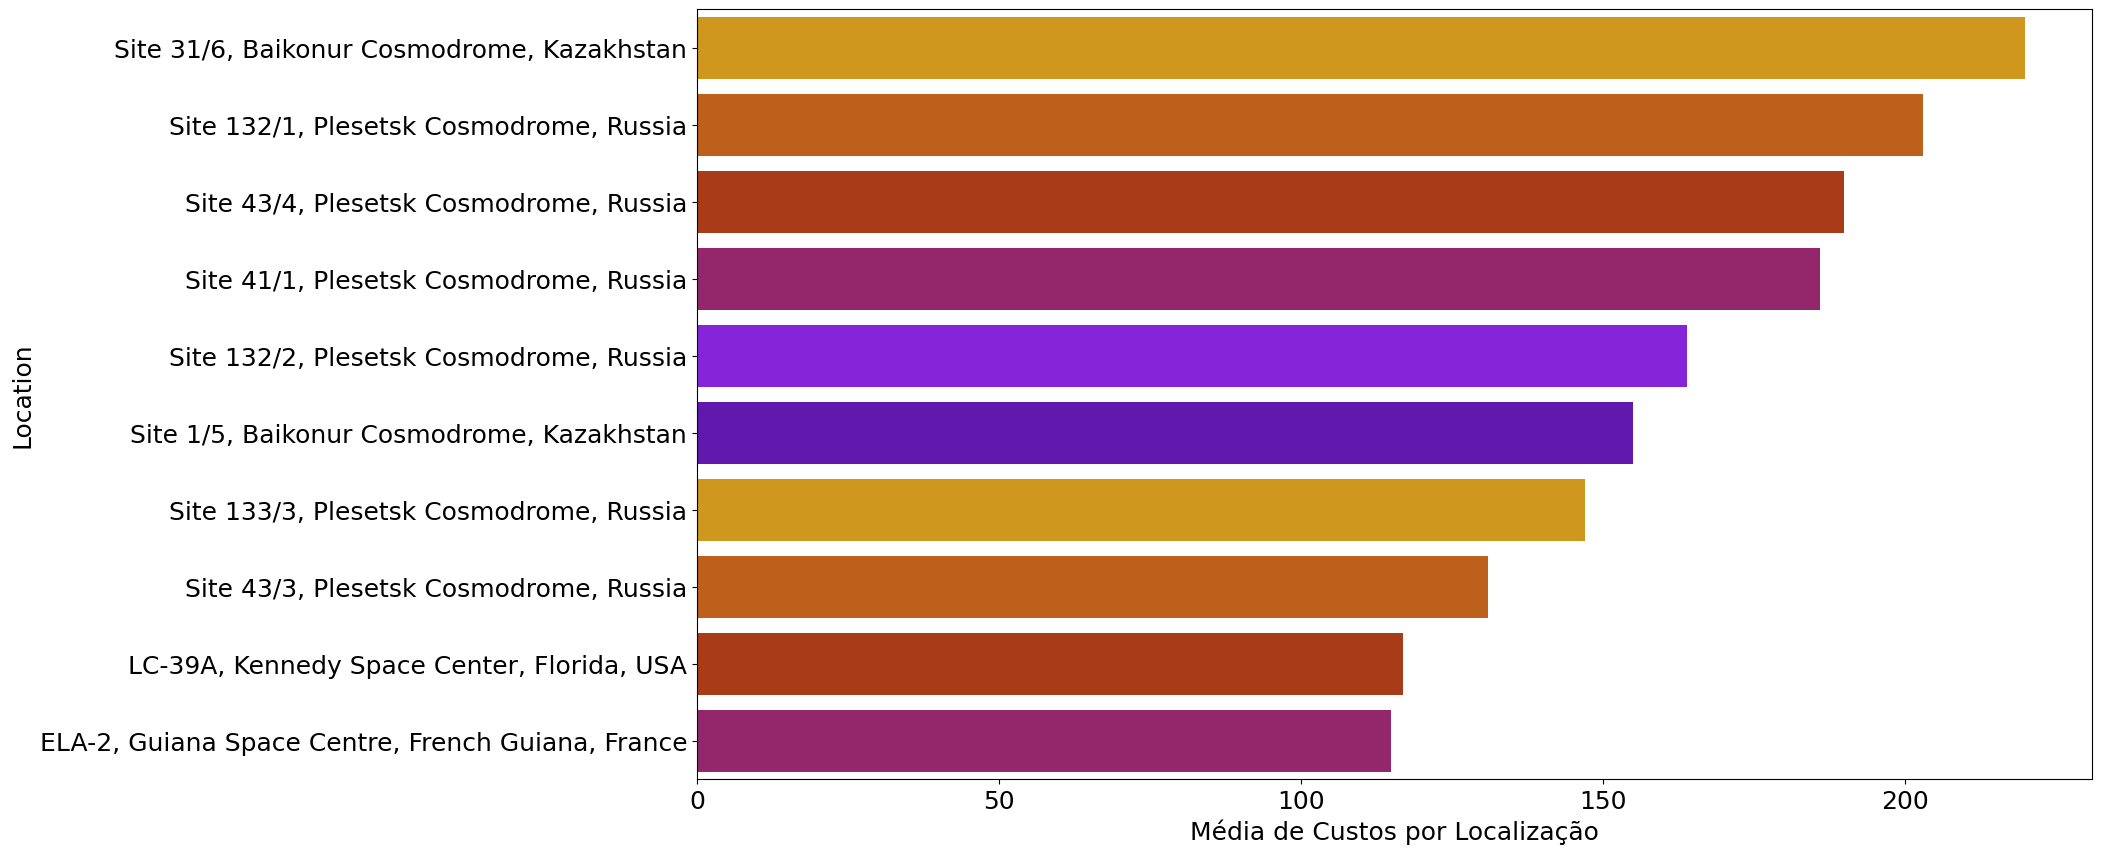

In [ ]:

Figura = sns.color_palette('gnuplot') #Apenas selecionado as cores do gráfico
Figura.reverse() #Apenas invertendo a sequência de cores

ax = sns.barplot(y = Agrupamento_Sucesso.index, x = 'Success', data = Agrupamento_Sucesso, palette = Figura)
plt.rcParams['figure.figsize'] = (18, 10) #Aumentar o tamanho da Figura
ax.set_xlabel('Média de Custos por Localização')
ax.set_autoscalex_on('das')
plt.rcParams.update({"font.size": 18}) #Aumentar a letra
plt.savefig('Linha_x_custos.png', dpi=300)
